# Lesson 11b: Object instances and `id()`

What happens when you write code like this:

In [20]:
from random import randint

# Lets create a long list of random elements

def large_obj():
    obj = [None]*1024**2
    for i in range(len(obj1)):
        obj[i] = randint(0,1023)
    return obj

# %time is a special Jupyter notebook feature to measure the execution time of a line of code
%time obj1 = large_obj()

CPU times: user 1.48 s, sys: 51.9 ms, total: 1.54 s
Wall time: 1.61 s


Naturally, it takes rather long to generate about a million random values in a list; a few seconds is forever in CPU time!

Lets make a copy of this large object, `obj1`, and name it `obj2`:

In [21]:
%time obj2 = obj1

CPU times: user 12.3 ms, sys: 3.58 ms, total: 15.9 ms
Wall time: 19.9 ms


That was so much faster. What is going on?

Lets see fi they are really identical copies:

In [11]:
obj1 == obj2

True

Hmm, it turns out they are. Let’s see if they re really _copies_. If I change `obj1`, will `obj2` change as well?

In [22]:
print(f'Originally, index 10 of obj1 is {obj1[10]}.')
print(f'changing obj1[10] to \'hello\'.')
obj1[10] = 'hello'
print(f'Now, index 10 of obj1 is {obj1[10]}.')
print(f'Now, index 10 of obj2 is {obj2[10]}.')

Originally, index 10 of obj1 is 922.
changing obj1[10] to 'hello'.
Now, index 10 of obj1 is hello.
Now, index 10 of obj2 is hello.


Hey! We didn’t change `obj2`, but when `obj1` was modified, `obj2` changed as well. What _is_ going on?

When an object is initialised in Python (remember, Python treats everything as an object, even basic data types and data structures), Python allocates some memory to store its data. Each object gets a unique `id`, which you can examine using the `id()` function:

(This is why `id` is a reserved keyword.)

In [24]:
print(f'id of obj1 is {id(obj1)}.')
print(f'id of obj2 is {id(obj2)}.')

id of obj1 is 140572937677256.
id of obj2 is 140572937677256.


Huh! `obj1` and `obj2` both have the same id! How is that possible if they are supposed to be _copies_ of each other?

## Python names vs Python objects

Heres something mindblowing: Python treats names and objects separately. (Many other object-oriented programming languages, e.g. C++, do this too.)

    obj = [None]*1024**2
    
Here, Python creates a `[None]` object first. It is a single-element list containing the value `None`. Python then concatenates this object to itself `1024**2` times, creating _another object_. So far, these objects have no names yet. There is no way for us to access them in the REPL shell.

When you use the assignment operator, though, Python assigns the final object to the variable. So the concatenated object can now be accessed through the `obj` name.

    for i in range(len(obj1)):
        obj[i] = randint(0,1023)

Here, each iteration of the for loop creates a new object from the output of `randint(0,1023)`. This object is assigned to `obj[i]`. Wait, isn’t `obj` already a name? Yes, it is a name that **points** to a list. `obj[i]` is _another name_ in that list which now points to—you guessed it—the newly created random `int`.

So `obj` is actually a list of names, rather than a list of values!

    obj2 = obj1
    
What happens here? When we assign `obj1` to `obj2`, Python checks to see which **object** the `obj1` name points to. It then creates another name, `obj2`, and also assigns it to the same object.

So when we modify `obj1` in the line `obj1[10] = 'hello'`, we modified the underlying object, which also affects `obj2`.

Understanding this concept will help you understand some of the more obscure bugs you come across in your Python code. The name is not the object!

## Python garbage collecting

Hold on … wouldn’t that leave a whole trail of unnamed objects as we write our code? That would be such a waste of memory!

Yup, in the olden days of programming (the days of C programming), programmers had to allocate and deallocate memory themselves. If they did not manage memory properly, their code would accumulate more and more objects until it finally runs out of memory, causing a **stack overflow**. (Now you know the origin of your favourite website’s name.)

Python (as well as other high-level programming languages) performs **garbage collection** on your behalf. It will check for objects that are no longer referenced (i.e. objects that are no longer in use and not referenced by anything). The memory used by these objects is then deallocated.

You can read about Python’s garbage collection implementation [in more detail here](https://stackify.com/python-garbage-collection/).

## Making true copies in Python

Okay, so if `obj2 = obj1` does not actually make a _true_ copy of obj1, how do we make a copy of obj1?

    obj2 = []
    for el in obj1:
        obj2.append(el)
        
Nah, we don’t actually have to resort to that. Python has a [`copy` library](https://docs.python.org/3.6/library/copy.html) for doing this.

### Shallow copy

In [2]:
import copy

a = [1,2,3]
b = [4,5,6]
c = [7,8,9]
d = [10,11,12]
abc = [a,b,c]
abd = copy.copy(abc) # This creates a shallow copy of abc

print('Note that abc and abd are different objects. \
They have different ids.')
print(f'id of abc is {id(abc)}')
print(f'id of abd is {id(abd)}')

print('Result of abc == abd: ',end='')
print(f'{abc == abd}')
print('Result of abc is abd: ',end='')
print(f'{abc is abd}')
print('')
print('abc is a separate copy of abd. If we reassign an \
element of abd, it will not affect abc.')
abd[2] = d
print(f'abc: {abc}')
print(f'abd: {abd}')
print('But if we modify the first element of abc directly \
without reassigning, abd will get affected as well:')
abc[0].append(123)
print(f'abc is {abc}')
print(f'abd is {abd}')
print('')
print('A shallow copy only copies the outermost element, \
but keeps the inner references the same.')

Note that abc and abd are different objects. They have different ids.
id of abc is 139672340047368
id of abd is 139672340205896
Result of abc == abd: True
Result of abc is abd: False

abc is a separate copy of abd. If we reassign an element of abd, it will not affect abc.
abc: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
abd: [[1, 2, 3], [4, 5, 6], [10, 11, 12]]
But if we modify the first element of abc directly without reassigning, abd will get affected as well:
abc is [[1, 2, 3, 123], [4, 5, 6], [7, 8, 9]]
abd is [[1, 2, 3, 123], [4, 5, 6], [10, 11, 12]]

A shallow copy only copies the outermost element, but keeps the inner references the same.


### Deep copy

In [3]:
import copy

a = [1,2,3]
b = [4,5,6]
c = [7,8,9]
d = [10,11,12]
abc = [a,b,c]
abd = copy.deepcopy(abc) # This creates a deep copy of abc

print('This time, if we modify the first element of abc directly, \
abd will NOT get affected:')
abc[0].append(123)
print(f'abc: {abc}')
print(f'abd: {abd}')
print('')
print('A deep copy will make a completely new copy of every object referenced \
within the outer object.')

This time, if we modify the first element of abc directly, abd will NOT get affected:
abc: [[1, 2, 3, 123], [4, 5, 6], [7, 8, 9]]
abd: [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

A deep copy will make a completely new copy of every object referenced within the outer object.


## Equality and identity (`==` vs `is`)

The equality operator (`==`) checks if the **result of evaluation** for two expressions/objects is the same.

The `is` keyword checks if two names **point to the same object**. You can verify this by using the `id()` helper function.

The two features serve different purposes.

This is why you never write `str1 is str2`, if they happen to be pointing to two different copies of identical strings, you would have a really bad time debugging it!

On the other hand, we write `value is None` or `value is not None` instead of `value == None` / `value != None`, because `None` is supposed to repreent no value. We can use `is` keyword because `None` is known as a **singleton object**. That means there can only be one copy of it at any time. `copy` would not work on it, and you can be assured that if two objects point to `None`, they must have the same id.

Let’s verify this:

In [9]:
import copy

print(f'None has id {id(None)}')
none2 = copy.copy(None)
print(f'none2 is a copy of None and has id {id(None)}')
print(f'none2 is None: {none2 is None}')

None has id 94746301573776
none2 is a copy of None and has id 94746301573776
none2 is None: True


This does not work for other types, e.g. strings:

In [8]:
import copy

print(f'\'a\' has id {id("a")}')
a2 = copy.copy(a)
print(f'a2 is a copy of \'a\' and has id {id(a)}')
print(f'a2 is \'a\': {a2 is "a"}')

'a' has id 139672432489168
a2 is a copy of 'a' and has id 139672340929992
a2 is 'a': False


How might we use this with classes? First, let’s think about what we would _like_ to happen. After all, as programmers and engineers, when designing a piece of software, we desire that it behaves a certain way, and then we write code that makes it happen. We don’t do it the other way around and say “too bad, the software is like this because the code behaves that way.”

## `Line`, revisited

In [65]:
class Line:
    '''
    A class representing a line with x- and y-dimensions.
    
    Methods:
    - length()
    - add(another_line)
      Returns a Line object representing the vector sum of
      the current Line and another_line.
    '''
    def __init__(self,x,y):
        self.x = x
        self.y = y
 
    def __repr__(self):
        return f'Line({self.x},{self.y})'
        
    # It is good practice to define all your dunder methods first,
    # starting with __init__(), before defining other methods after them.
    def length(self):
        return math.sqrt(self.x**2 + self.y**2)

    def add(self,line):
        new_x = self.x + line.x
        new_y = self.y + line.y
        return Line(new_x,new_y)

Ideally, this should work:

    >>> line0 = Line(0,0) # a line
    >>> line1 = Line(0,0) # another line
    >>> line0 is line1
    False
    >>> line0 == line1
    True
    
Let’s try it:

In [67]:
line0 = Line(0,0)
line1 = Line(1,1)
print(f'{line0 is line1}')
print(f'{line0 == line1}')

False
False


Odd ... that didn’t work. Why not?

## The `__eq__()` dunder method

When we write `line0 == line1`, Python checks to see if the `__eq__()` dunder method is implemented for `line0`. If the `line0` object does not have an `__eq__()` method, Python returns `False`. This is what happened.

In [68]:
print(f'{line0.__eq__(line1)}')

NotImplemented


If `line0` does have an `__eq__()` method, Python will evaluate the expression `line0.__eq__(line1)` instead.

Let’s implement `__eq__()` for `Line`.

## Task 1: Define `__eq__()` dunder method for `Line`

In [71]:
class Line:
    '''
    A class representing a line with x- and y-dimensions.
    
    Methods:
    - length()
    - add(another_line)
      Returns a Line object representing the vector sum of
      the current Line and another_line.
    '''
    def __init__(self,x,y):
        self.x = x
        self.y = y
 
    def __repr__(self):
        return f'Line({self.x},{self.y})'
    
    def __eq__(self, other):
        # Implement code here to return True of another_line has
        # the same x and y coordinate has this object, or return
        # False if the x or y coordinate is not the same.
        ### BEGIN SOLUTION
        return (self.x == other.x) and (self.y == other.y)
        ### END SOLUTION
        
    # It is good practice to define all your dunder methods first,
    # starting with __init__(), before defining other methods after them.
    def length(self):
        return math.sqrt(self.x**2 + self.y**2)

    def add(self, other):
        new_x = self.x + other.x
        new_y = self.y + other.y
        return Line(new_x,new_y)

In [73]:
# Use this code cell to test
line0 = Line(0,0)
line1 = Line(0,0)
line2 = Line(0,1)
print(f'{line0 == line1}')
print(f'{line0 == line2}')

True
False


## Other comparison dunder methods

If `__eq__()` is the dunder method called by the `==` operator, there must be other dunder methods for other comparison operators right? Yes, that’s right! The full list of dunders can be found in the [Python Data Model](https://docs.python.org/3.6/reference/datamodel.html) documentation, under [Special method names](https://docs.python.org/3.6/reference/datamodel.html#special-method-names).

| This dunder method …  |  Is called by this operator  |
| --------------------- | ---------------------------- |
|  `__lt__(self,other)` | `<` (less than)              |
|                                                      |
| `__le__(self, other)` | `<=` (less than or equal)    |
|                                                      |
| `__ne__(self, other)` | `!=` (not equal)             |
|                                                      |
| `__gt__(self, other)` | `>` (greater than)           |
|                                                      |
| `__ge__(self, other)` | `>=` (greater than or equal) |

## Why would we need this?

The Python `datetime` library uses custom implementations of the comparison operators to enable you to compare different times (code examples from [tutorialspoint](https://www.tutorialspoint.com/comparing-dates-in-python)):

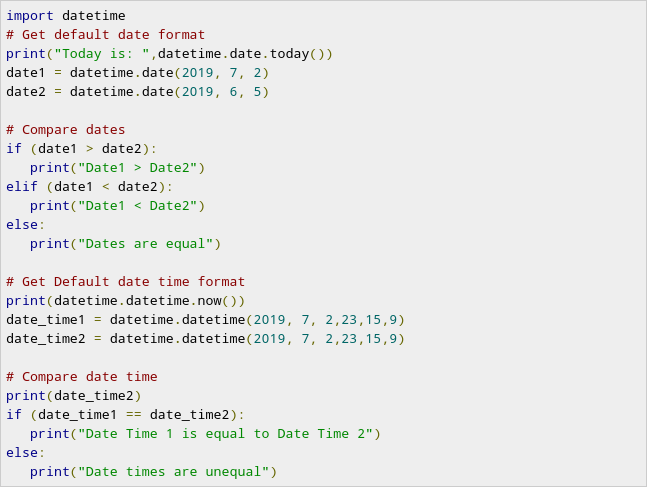

You may one day find yourself needing to implement a custom object type for a measurement or quantity. You could come up with your own unintuitive methods to compare two different objects, or you could define these dunder methods to enable them to be compared with the comparison operators instead. It’s your choice.

# Feedback and suggestions

Any feedback or suggestions for this assignment?